In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
data = pd.read_csv("merged_data.csv")
data = data.iloc[:, 1:]

X = data.drop(columns=['Nicotine12'])
X = pd.DataFrame(X)
y = data['Nicotine12']
y = pd.DataFrame(y)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1337)

# Random Forest Classifier Accuracy

In [24]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

np.random.seed(1337)

#Search Params
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

#Instantiate Random Forest
rf = RandomForestClassifier()

#Perform grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 20, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

#Select Best Model Found
best_model = grid_search.best_estimator_

#Define cross-validation method to use
cv = KFold(n_splits = 20, shuffle = True, random_state = 1337)

#Use twenty-fold cross-validation to evaluate model accuracy
scores = cross_val_score(best_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

#View mean accuracy
accuracy = np.mean(scores)
print("All Measures Accuracy:", accuracy)

All Measures Accuracy: 0.6241116302240439


# Visualizing Feature Importance

In [25]:
importances = best_model.feature_importances_

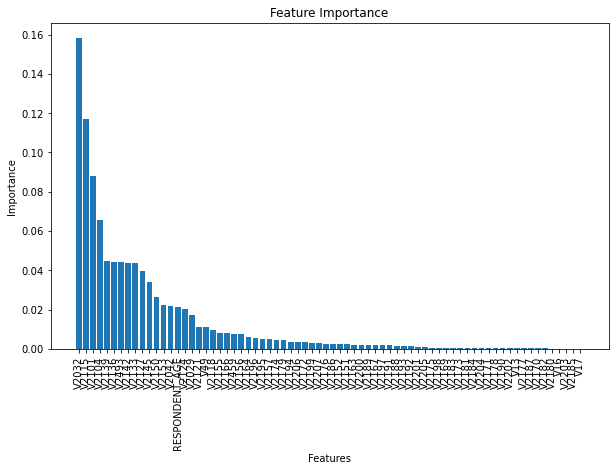

In [26]:
#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

#Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

#Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()